In [28]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from PIL import Image
import numpy as np
import os

In [29]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
print(type(X_train))
print(X_train.shape)

print(type(y_train))
print(y_train.shape)

print(type(X_test))
print(X_test.shape)

print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
<class 'numpy.ndarray'>
(10000, 28, 28)
<class 'numpy.ndarray'>
(10000,)


In [31]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

dir='/home/dl/mnist/data/mnist_png/training/'
numFiles = 0
X_data = []
y_data = []

for root, dirs, files in os.walk(dir):
    for name in files:
        if ".png" not in name:
            continue
        numFiles+=1
        img = load_img(os.path.join(root, name))
        img_array = img_to_array(img)
        X_data.append(img_array)
        y_data.append(root.split("/")[-1])
print('X_data shape:', np.array(X_data).shape)
print('y_data shape:', np.array(y_data).shape)
X_train = np.array(X_data)
y_train = np.array(y_data)

X_data shape: (60000, 28, 28, 3)
y_data shape: (60000,)


In [32]:
dir='/home/dl/mnist/data/mnist_png/testing/'
numFiles = 0
X_data = []
y_data = []

for root, dirs, files in os.walk(dir):
    for name in files:
        if ".png" not in name:
            continue
        numFiles+=1
        img = load_img(os.path.join(root, name))
        img_array = img_to_array(img)
        X_data.append(img_array)
        y_data.append(root.split("/")[-1])
print('X_data shape:', np.array(X_data).shape)
print('y_data shape:', np.array(y_data).shape)
X_test = np.array(X_data)
y_test = np.array(y_data)

X_data shape: (10000, 28, 28, 3)
y_data shape: (10000,)


In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(y_train.shape)

print(y_train[:10])

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

(60000,)
['8' '8' '8' '8' '8' '8' '8' '8' '8' '8']


In [52]:
import numpy as np
np.random.seed(2019)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,3)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_log = model.fit(X_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))
 

score = model.evaluate(X_test, y_test, verbose=1)

/usr/local/finra/anaconda/anaconda3/envs/finra_p36/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 3...)`
  if sys.path[0] == '':
/usr/local/finra/anaconda/anaconda3/envs/finra_p36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/finra/anaconda/anaconda3/envs/finra_p36/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 398us/step - loss: 0.1966 - accuracy: 0.9398 - val_loss: 0.0463 - val_accuracy: 0.9857
Epoch 2/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0857 - accuracy: 0.9740 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 3/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0700 - accuracy: 0.9783 - val_loss: 0.0332 - val_accuracy: 0.9896
Epoch 4/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 5/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0307 - val_accuracy: 0.9902
Epoch 6/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0253 - val_accuracy: 0.9923
Epoch 7/10
60000/60000 [==============================] 

In [53]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028543044543046743
Test accuracy: 0.9929999709129333


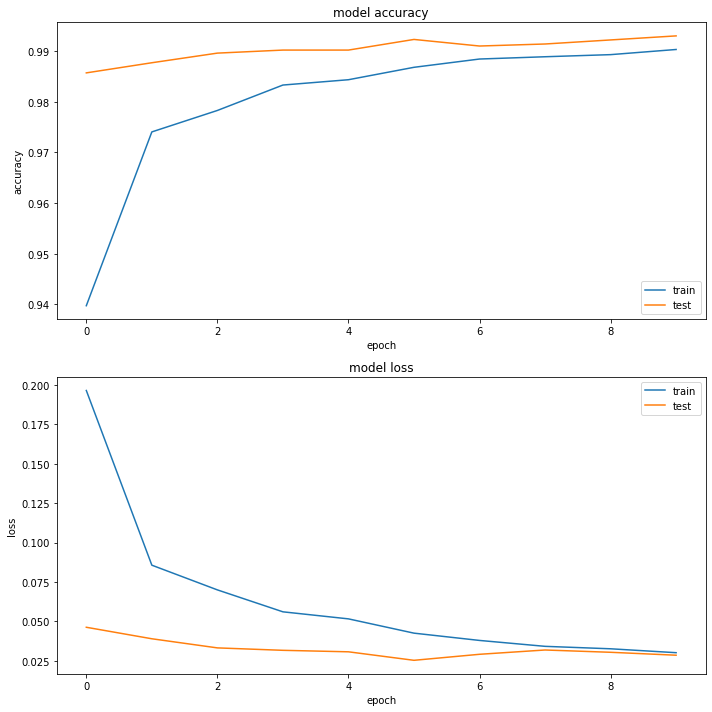

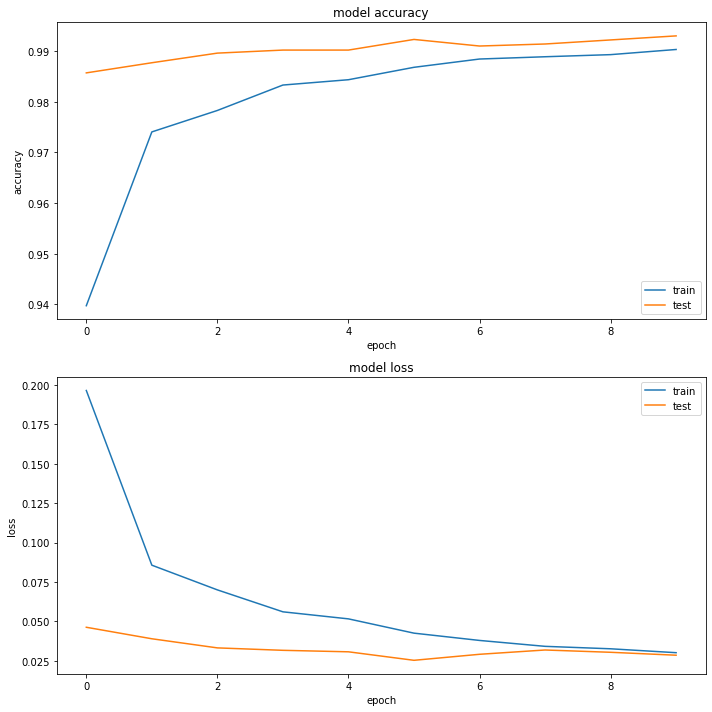

In [59]:
import os
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,10))

# plotting the metrics
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig